# 1. Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#transform
from sklearn.preprocessing import MinMaxScaler

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#metrics
from sklearn.metrics import classification_report

#support
from sklearn.model_selection import GridSearchCV


# 2. Data Handling

Addition to the prototyping steps we will change the values of few colomns which has opposite value ie has card? If yes then 1 if no then -1 to see how model reacts to this

In [3]:
train_df = pd.read_csv("D:\project\ML_daddy_staging\Bank_churn\Bank_churn_data\churn.csv")
train_df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#no null value
train_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [135]:
#Finding unique value in each field - we will use this to make our webapp
for col in train_df:
    uniq = train_df[col].unique()
    print(f"Column: {col} \t Unique_values: {len(uniq)}")

Column: RowNumber 	 Unique_values: 10000
Column: CustomerId 	 Unique_values: 10000
Column: Surname 	 Unique_values: 2932
Column: CreditScore 	 Unique_values: 460
Column: Geography 	 Unique_values: 3
Column: Gender 	 Unique_values: 2
Column: Age 	 Unique_values: 70
Column: Tenure 	 Unique_values: 11
Column: Balance 	 Unique_values: 6382
Column: NumOfProducts 	 Unique_values: 4
Column: HasCrCard 	 Unique_values: 2
Column: IsActiveMember 	 Unique_values: 2
Column: EstimatedSalary 	 Unique_values: 9999
Column: Exited 	 Unique_values: 2


In [117]:
#dropping customerid and surname since it has not use
train_df = train_df.drop(['CustomerId','Surname','RowNumber'],axis=1)
train_df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [118]:
train_df['HasCrCard'] = train_df['HasCrCard'].map({1:1,0:-1})
train_df['IsActiveMember'] = train_df['IsActiveMember'].map({1:1,0:-1})
train_df['Gender'] = train_df['Gender'].map({'Male':-1, 'Female':1})
train_df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,-1,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,-1,113931.57,1
3,699,France,1,39,1,0.00,2,-1,-1,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

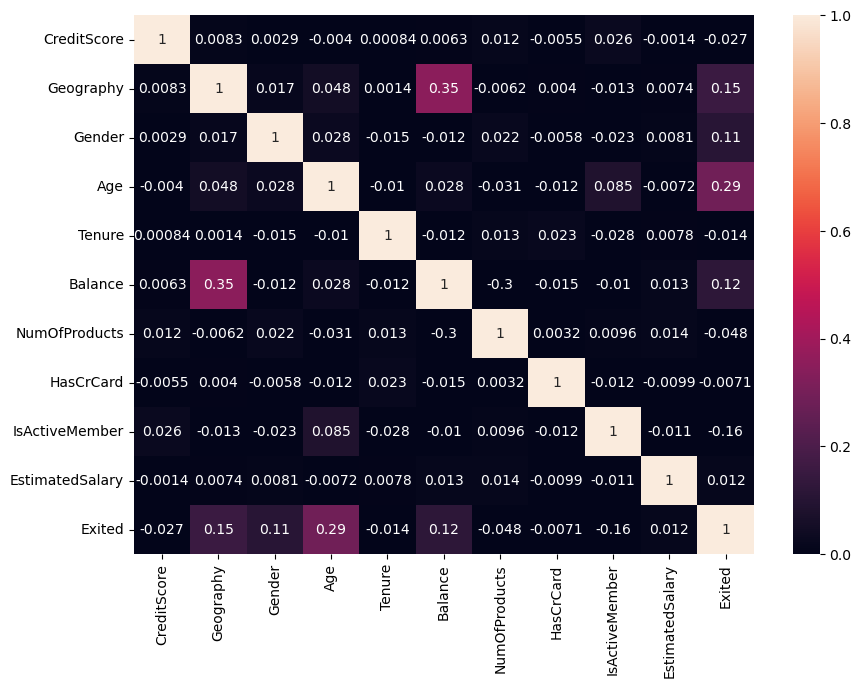

In [119]:
train_df['Geography'] = train_df['Geography'].map({'France':0,'Spain':1, 'Germany':2})
plt.figure(figsize=(10, 7))
sns.heatmap(train_df.corr(),vmin=0,vmax=1,annot=True)

In [120]:
train_df= pd.get_dummies(train_df,columns=['Geography', 'Gender'])
train_df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_-1,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0,1
1,608,41,1,83807.86,1,-1,1,112542.58,0,0,1,0,0,1
2,502,42,8,159660.80,3,1,-1,113931.57,1,1,0,0,0,1
3,699,39,1,0.00,2,-1,-1,93826.63,0,1,0,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0,1


In [121]:
y_train_df = train_df['Exited']
x_train_df = train_df.drop(['Exited'],axis=1)

In [122]:
#We need this detail for our webapp
x_train_df.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Geography_0          uint8
Geography_1          uint8
Geography_2          uint8
Gender_-1            uint8
Gender_1             uint8
dtype: object

In [123]:
# normalizing the data
#continous data column
cont_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scalar = MinMaxScaler()
x_train_df[cont_col] = scalar.fit_transform(x_train_df[cont_col])
x_train_df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_0,Geography_1,Geography_2,Gender_-1,Gender_1
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0,1
1,0.516,0.310811,0.1,0.334031,0.000000,-1,1,0.562709,0,1,0,0,1
2,0.304,0.324324,0.8,0.636357,0.666667,1,-1,0.569654,1,0,0,0,1
3,0.698,0.283784,0.1,0.000000,0.333333,-1,-1,0.469120,1,0,0,0,1
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1,0,0,1


In [124]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_train_df, y_train_df, test_size=0.15, shuffle=True, random_state=42)

In [125]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(8500, 13) (1500, 13) (8500,) (1500,)


# 3. Training the model and testing

Model Evaluation function

In [77]:
def model_evaluate(model):
    print('Train data metrics \n')
    print(classification_report(ytrain, model.predict(xtrain)))

    print('Test data metrics \n')
    print(classification_report(ytest,model.predict(xtest)))

## a. Logistic regression

In [86]:
log = LogisticRegression(random_state=42)
log_model = log.fit(xtrain,ytrain)

In [87]:
model_evaluate(log_model)

Train data metrics 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6356
           1       0.61      0.22      0.32      1644

    accuracy                           0.81      8000
   macro avg       0.72      0.59      0.61      8000
weighted avg       0.78      0.81      0.77      8000

Test data metrics 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## b. Support Vector Machine

In [79]:
svc = SVC(random_state=42)
svc_model = svc.fit(xtrain,ytrain)

In [80]:
model_evaluate(svc_model)

Train data metrics 

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      6356
           1       0.87      0.22      0.35      1644

    accuracy                           0.83      8000
   macro avg       0.85      0.60      0.62      8000
weighted avg       0.84      0.83      0.79      8000

Test data metrics 

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1607
           1       0.82      0.20      0.33       393

    accuracy                           0.83      2000
   macro avg       0.83      0.60      0.62      2000
weighted avg       0.83      0.83      0.79      2000



## c. Knearest Classifier

In [82]:
knn = KNeighborsClassifier()
knn_model = knn.fit(xtrain, ytrain)

In [83]:
model_evaluate(knn_model)
#we can ignore the warning

Train data metrics 



c:\Users\vicky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6356
           1       0.79      0.47      0.59      1644

    accuracy                           0.87      8000
   macro avg       0.83      0.72      0.75      8000
weighted avg       0.86      0.87      0.85      8000

Test data metrics 

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1607
           1       0.59      0.32      0.42       393

    accuracy                           0.82      2000
   macro avg       0.72      0.63      0.66      2000
weighted avg       0.80      0.82      0.80      2000



c:\Users\vicky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## d. RandomForestClassifier

In [93]:
param_grid=({'n_estimators':[20,40,60,80,100],'criterion':['gini'], 'max_depth':[6,8,10,12], 'max_features':[8,10,12]})
rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc, param_grid, refit=True, verbose=0)
rfc_cv.fit(xtrain,ytrain)

print(rfc_cv.best_score_)    
print(rfc_cv.best_params_)
print(rfc_cv.best_estimator_)

model_evaluate(rfc_cv)


0.865625
{'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'n_estimators': 40}
RandomForestClassifier(max_depth=10, max_features=8, n_estimators=40)
Train data metrics 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6356
           1       0.93      0.61      0.73      1644

    accuracy                           0.91      8000
   macro avg       0.92      0.80      0.84      8000
weighted avg       0.91      0.91      0.90      8000

Test data metrics 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [128]:
## b. RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10, max_features=8, n_estimators=40, criterion='entropy', random_state=42)

# tried differet n_estimator and score for 20 is 85.45 and for 100 is 85.6
rfc_model = rfc.fit(xtrain,ytrain)

In [129]:
model_evaluate(rfc_model)

Train data metrics 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6756
           1       0.92      0.58      0.71      1744

    accuracy                           0.90      8500
   macro avg       0.91      0.79      0.83      8500
weighted avg       0.90      0.90      0.90      8500

Test data metrics 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1207
           1       0.75      0.46      0.57       293

    accuracy                           0.86      1500
   macro avg       0.81      0.71      0.74      1500
weighted avg       0.85      0.86      0.85      1500



In general, 
- We will stop using ROC and Accuracy since the data is skewed i.e not exited customers are more-70% So a model can get higher accuracy by just putting everything as not exited i.e 0 
- F1 score  which is a combined score for precision and recall
- Precision: How many of the positively predicted values are right
- Recall: How many positive values in ytest are truely identified as positive

More in: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

In [ ]:
# This is not required for now
# #we can see each class probability using predict_proba
# for i in range(0,20):
#     prediction = rfc_model.predict(xtest[i])
#     actual = ytest.iloc[i]
#     print(f"Prediction: {prediction}, Actual: {actual}")

Trying to see the important feature after training

In [133]:
importance_df = pd.DataFrame({
    'Features': x_train_df.columns,
    'Importance': rfc_model.feature_importances_
}).sort_values('Importance', ascending=True)

px.bar(importance_df,x='Importance', y='Features', title='Feature Importance')

In [41]:
# Saving the model
import pickle
pickle.dump(rfc_model, open('churn_rfc_model.pkl', 'wb'))

In [42]:
loaded_rfc_model = pickle.load(open('churn_rfc_model.pkl', 'rb'))

In [ ]:
loaded_rfc_pred = loaded_rfc_model.predict(xtest)
model_evaluate(loaded_rfc_pred)

#we should get the same output pre-saving the model